In [ ]:
!pip install pycaret[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 95.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

file_path = '/content/drive/My Drive/Datamining/TSLA.csv'
data = pd.read_csv(file_path)

data.head()
data.info()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2457 entries, 0 to 2456
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2457 non-null   object 
 1   Open       2457 non-null   float64
 2   High       2457 non-null   float64
 3   Low        2457 non-null   float64
 4   Close      2457 non-null   float64
 5   Adj Close  2457 non-null   float64
 6   Volume     2457 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 134.5+ KB


In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
print(data.columns.tolist())

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [ ]:
print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data.asfreq('D')


In [ ]:
global_fig_settings = {
    # "renderer": "notebook",
    "renderer": "png",
    "width": 1000,
    "height": 600,
}

In [ ]:
target = "Close"

In [ ]:
import time
import numpy as np
import pandas as pd

from pycaret.datasets import get_data
from pycaret.time_series import TSForecastingExperiment

In [ ]:
eda = TSForecastingExperiment()

In [ ]:
duplicates = data.index.duplicated(keep=False)
print(data[duplicates])

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300.0
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100.0
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800.0
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800.0
2010-07-03,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sktime.datatypes import check_raise
check_raise(data, mtype="pd.DataFrame")


True

In [ ]:
from pycaret.time_series import TSForecastingExperiment

# Setup the experiment
eda.setup(
    data=data,
    target=target,  # Specify the target column
    fh=48,  # Forecast horizon
    numeric_imputation_target="ffill",  # Imputation strategy for target
    numeric_imputation_exogenous="ffill",  # Imputation strategy for exogenous variables
    fig_kwargs=global_fig_settings,  # Figure settings for plots
    session_id=42,  # For reproducibility
    use_gpu=True
)


,Description,Value
0,session_id,42
1,Target,Close
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(3565, 6)"
5,Transformed data shape,"(3565, 6)"
6,Transformed train set shape,"(3517, 6)"
7,Transformed test set shape,"(48, 6)"
8,Rows with missing values,31.1%
9,Fold Generator,ExpandingWindowSplitter


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Th

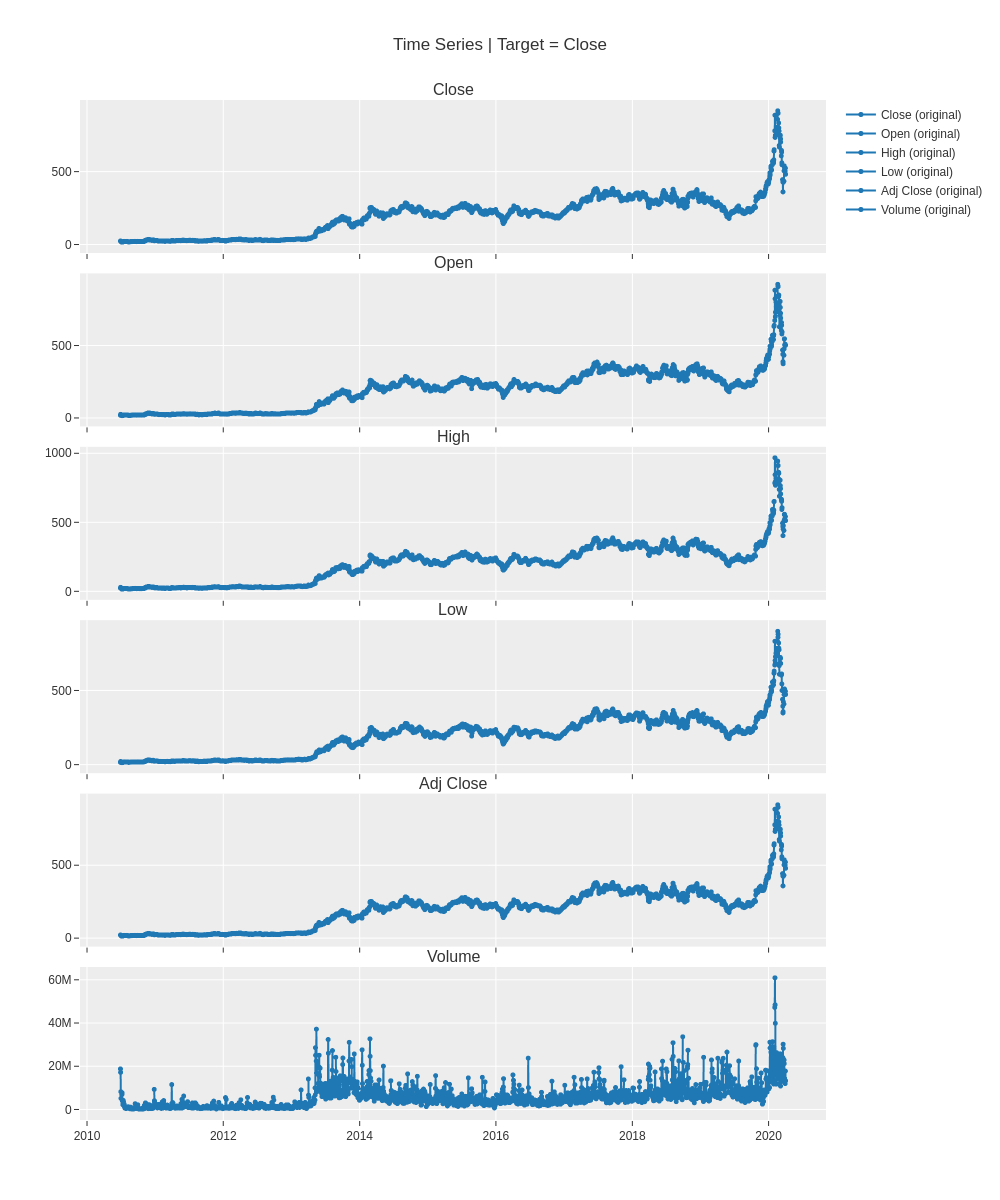

In [ ]:
eda.plot_model(fig_kwargs={"renderer": "png", "width": 1000, "height": 1200})

In [ ]:
eda.plot_model(
    plot="ts",
    fig_kwargs={
        'height': 1200,
        "resampler_kwargs": {
            "default_n_shown_samples": 1500,
            # show_dash kwargs withholds the kwargs of the show_dash (render) method.
            "show_dash": {"mode": "inline", "port": 8055},
        },
    },
    display_format="plotly-dash",
)

<IPython.core.display.Javascript object>

In [ ]:
eda.plot_model(
    plot="diff",
    fig_kwargs={
        "height": 900,
        "resampler_kwargs": {
            "default_n_shown_samples": 1500,
            "show_dash": {"mode": "inline", "port": 8056},
        },
    },
    data_kwargs={
        "lags_list": [1, [1, 24]],
        "acf": True,
        "pacf": True,
        "periodogram": True,
    },
     display_format='plotly-dash',
)


<IPython.core.display.Javascript object>

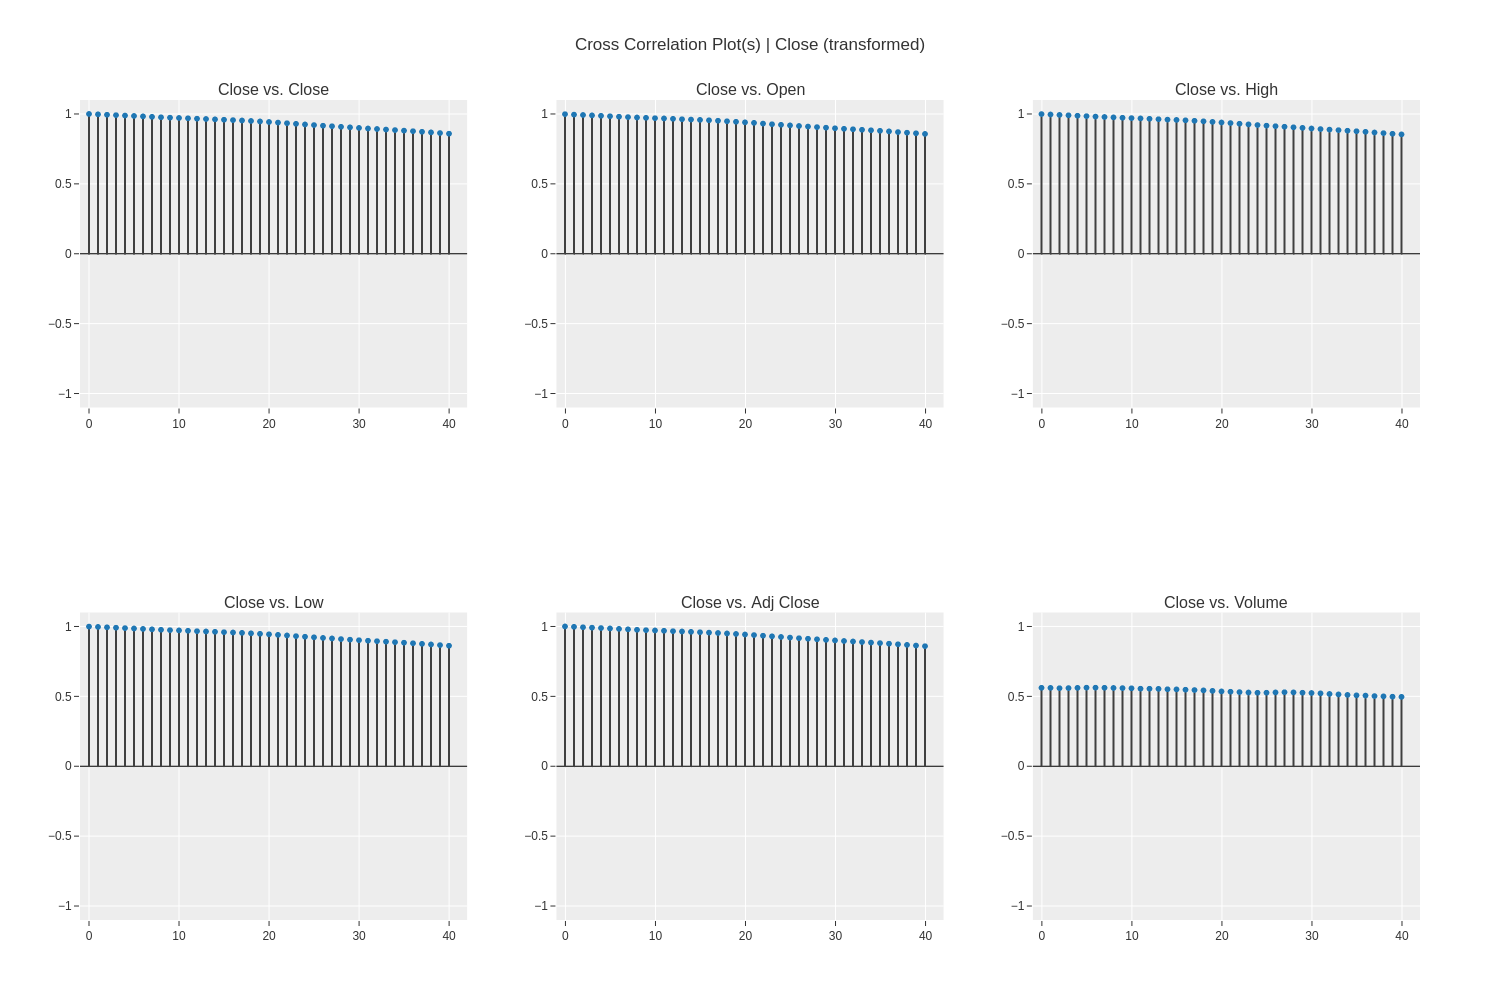

In [ ]:
eda.plot_model(plot="ccf", fig_kwargs={"height": 1000, "width": 1500})

In [ ]:
exp_uni = TSForecastingExperiment()
exp_uni.setup(
    data=data, fh=48, target=target,
    numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",
    fig_kwargs=global_fig_settings, session_id=42
)

,Description,Value
0,session_id,42
1,Target,Close
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(3565, 6)"
5,Transformed data shape,"(3565, 6)"
6,Transformed train set shape,"(3517, 6)"
7,Transformed test set shape,"(48, 6)"
8,Rows with missing values,31.1%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
model = exp_uni.create_model("arima", order=(0,1,0), seasonal_order=(0,1,0,24))

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2019-09-22,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
1,2019-11-09,0.0072,0.0361,0.1656,1.1475,0.0005,0.0005,0.9986
2,2019-12-27,0.0274,0.0958,0.6533,3.2007,0.0015,0.0015,0.9994
Mean,NaT,0.0115,0.0440,0.2730,1.4494,0.0007,0.0007,0.9993
SD,NaT,0.0116,0.0395,0.2773,1.3240,0.0006,0.0006,0.0006


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

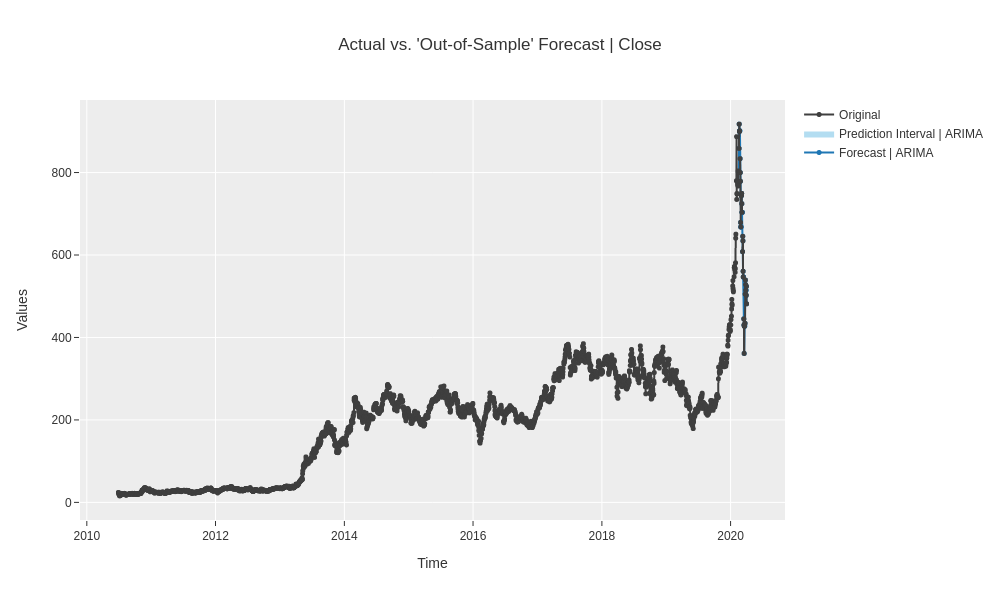

In [ ]:
exp_uni.plot_model(model)

In [ ]:
exp_exo = TSForecastingExperiment()
exp_exo.setup(
    data=data, target=target, fh=48,
    numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",
    fig_kwargs=global_fig_settings, session_id=42, use_gpu=True
)

,Description,Value
0,session_id,42
1,Target,Close
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(3565, 6)"
5,Transformed data shape,"(3565, 6)"
6,Transformed train set shape,"(3517, 6)"
7,Transformed test set shape,"(48, 6)"
8,Rows with missing values,31.1%
9,Fold Generator,ExpandingWindowSplitter


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Th

In [ ]:
model_exo = exp_exo.create_model("arima", order=(0,1,0), seasonal_order=(0,1,0,24))

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2019-09-22,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
1,2019-11-09,0.0072,0.0361,0.1656,1.1475,0.0005,0.0005,0.9986
2,2019-12-27,0.0274,0.0958,0.6533,3.2007,0.0015,0.0015,0.9994
Mean,NaT,0.0115,0.0440,0.2730,1.4494,0.0007,0.0007,0.9993
SD,NaT,0.0116,0.0395,0.2773,1.3240,0.0006,0.0006,0.0006


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

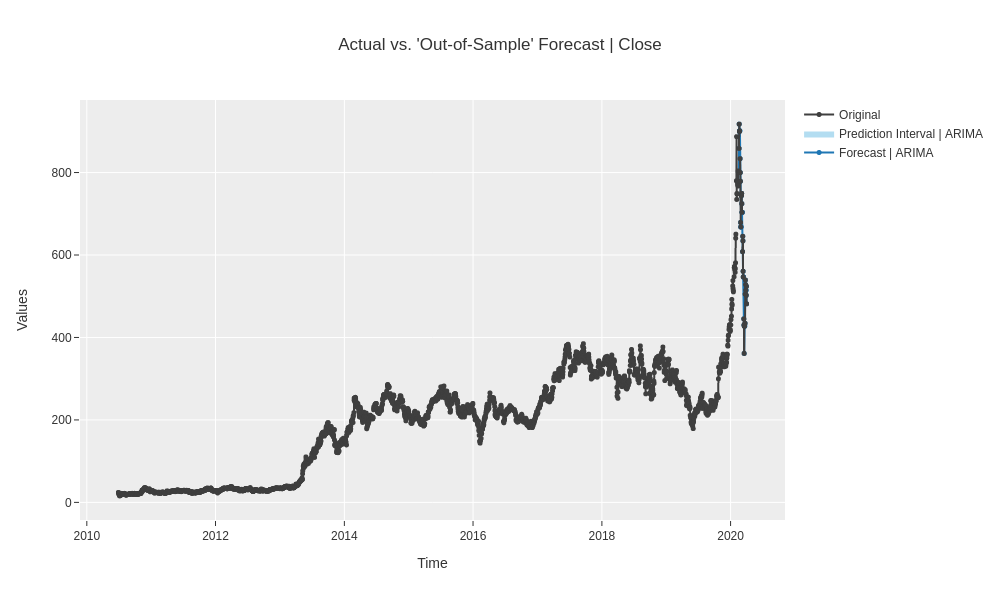

In [ ]:
exp_exo.plot_model(model_exo)

In [ ]:
final_model_exo = exp_exo.finalize_model(model_exo)

In [ ]:
def safe_predict(exp, model):
    """Prediction wrapper for demo purposes."""
    try:
        exp.predict_model(model)
    except ValueError as exception:
        print(exception)
        exo_vars = exp.exogenous_variables
        print(f"{len(exo_vars)} exogenous variables (X) needed in order to make future predictions:\n{exo_vars}")

safe_predict(exp_exo, final_model_exo)

Model was trained with exogenous variables but you have not passed any for predictions. Please pass exogenous variables to make predictions.
5 exogenous variables (X) needed in order to make future predictions:
['Open', 'High', 'Low', 'Adj Close', 'Volume']


In [ ]:
exp_slim = TSForecastingExperiment()
keep = [target, 'Open', "High", "Low"]
data_slim = data[keep]
exp_slim.setup(
    data=data_slim, target=target, fh=48,
    numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",
    fig_kwargs=global_fig_settings, session_id=42, use_gpu=True
)

,Description,Value
0,session_id,42
1,Target,Close
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(3565, 4)"
5,Transformed data shape,"(3565, 4)"
6,Transformed train set shape,"(3517, 4)"
7,Transformed test set shape,"(48, 4)"
8,Rows with missing values,31.1%
9,Fold Generator,ExpandingWindowSplitter


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Th

In [ ]:
model_slim = exp_slim.create_model("arima", order=(0,1,0), seasonal_order=(0,1,0,24))

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2019-09-22,0.1659,0.1423,3.7479,4.4582,0.0136,0.0136,0.9862
1,2019-11-09,0.5976,0.4797,13.6760,15.2367,0.0382,0.0373,0.7620
2,2019-12-27,0.2777,0.2550,6.6209,8.5209,0.0114,0.0114,0.9954
Mean,NaT,0.3471,0.2923,8.0149,9.4053,0.0211,0.0208,0.9145
SD,NaT,0.1829,0.1402,4.1713,4.4445,0.0121,0.0117,0.1079


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

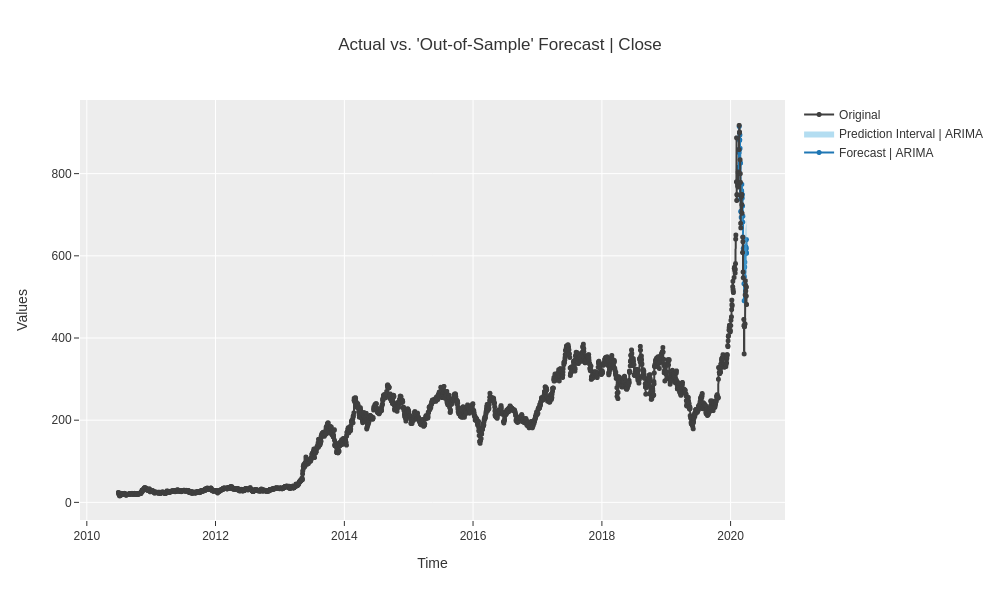

In [ ]:
exp_slim.plot_model(model_slim)

In [ ]:
final_slim_model = exp_slim.finalize_model(model_slim)

In [ ]:
_ = exp_slim.save_model(final_slim_model, "final_slim_model")

Transformation Pipeline and Model Successfully Saved


In [ ]:
safe_predict(exp_slim, final_slim_model)

Model was trained with exogenous variables but you have not passed any for predictions. Please pass exogenous variables to make predictions.
3 exogenous variables (X) needed in order to make future predictions:
['Open', 'High', 'Low']


In [ ]:
exog_vars = ['Open', 'Low', 'High']

exog_exps = []
exog_models = []
for exog_var in exog_vars:
    exog_exp = TSForecastingExperiment()
    exog_exp.setup(
        data=data[[ exog_var]], target=exog_var, fh=48,
        numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",
        fig_kwargs=global_fig_settings, session_id=42
    )

    # Users can customize how to model future exogenous variables i.e. add
    # more steps and models to potentially get better models at the expense
    # of higher modeling time.
    best = exog_exp.compare_models(
        sort="mase", include=["arima", "ets", "exp_smooth", "theta", "lightgbm_cds_dt",]
    )
    final_exog_model = exog_exp.finalize_model(best)

    exog_exps.append(exog_exp)
    exog_models.append(final_exog_model)

# Step 2: Get future predictions for exog variables ----
future_exog = [
    exog_exp.predict_model(exog_model)
    for exog_exp, exog_model in zip(exog_exps, exog_models)
]
future_exog = pd.concat(future_exog, axis=1)
future_exog.columns = exog_vars

,Description,Value
0,session_id,42
1,Target,Open
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(3565, 1)"
5,Transformed data shape,"(3565, 1)"
6,Transformed train set shape,"(3517, 1)"
7,Transformed test set shape,"(48, 1)"
8,Rows with missing values,31.1%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
arima,ARIMA,3.6143,3.3902,56.3302,76.5348,0.1126,0.1252,-0.3107,2.9967
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,3.9488,3.7827,61.3160,85.0304,0.1318,0.1497,-1.1428,3.5633
exp_smooth,Exponential Smoothing,3.9662,3.7319,61.8675,84.2875,0.1204,0.1371,-0.5621,1.0300
ets,ETS,3.9924,3.7663,62.2711,85.0550,0.1214,0.1382,-0.6206,2.4800
theta,Theta Forecaster,4.0475,3.8155,63.1324,86.1667,0.1229,0.1403,-0.6642,0.1167


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

,Description,Value
0,session_id,42
1,Target,Low
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(3565, 1)"
5,Transformed data shape,"(3565, 1)"
6,Transformed train set shape,"(3517, 1)"
7,Transformed test set shape,"(48, 1)"
8,Rows with missing values,31.1%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
arima,ARIMA,3.5942,3.3425,52.1866,70.5953,0.1101,0.1189,-0.2674,1.1267
ets,ETS,4.2266,3.9382,61.4472,83.1980,0.1230,0.1406,-0.6815,1.0833
exp_smooth,Exponential Smoothing,4.2525,3.9620,61.8115,83.6838,0.1244,0.1422,-0.7190,0.6367
theta,Theta Forecaster,4.2770,3.9882,62.1826,84.2557,0.1245,0.1424,-0.7425,0.1733
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,4.6827,4.2372,67.8562,89.2932,0.1483,0.1708,-1.2112,4.5667


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

,Description,Value
0,session_id,42
1,Target,High
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(3565, 1)"
5,Transformed data shape,"(3565, 1)"
6,Transformed train set shape,"(3517, 1)"
7,Transformed test set shape,"(48, 1)"
8,Rows with missing values,31.1%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,2.6314,2.7424,62.3436,90.6045,0.1166,0.1342,-0.4930,5.8267
theta,Theta Forecaster,2.9173,2.8802,69.2100,95.1522,0.1285,0.1487,-0.6776,0.1067
exp_smooth,Exponential Smoothing,2.9461,2.8612,69.9210,94.5699,0.1296,0.1499,-0.6164,0.8367
ets,ETS,2.9532,2.8765,70.0741,95.0495,0.1302,0.1507,-0.6580,8.4500
arima,ARIMA,3.3357,3.0131,79.0579,99.5424,0.1536,0.1776,-0.8253,21.9467


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
future_exog

,Open,Low,High
2020-04-02,450.4446,476.3676,519.3569
2020-04-03,470.0693,417.7496,519.3782
2020-04-04,475.3544,372.7385,516.3845
2020-04-05,480.4192,328.3567,522.4393
2020-04-06,359.7730,337.3663,528.3565
2020-04-07,334.9345,405.7095,533.2805
2020-04-08,288.3823,406.6783,544.7783
2020-04-09,278.3543,407.6046,542.3271
2020-04-10,345.9483,393.2004,539.9479
2020-04-11,349.8717,457.5474,547.7888


In [ ]:
exp_future = TSForecastingExperiment()

In [ ]:
final_slim_model = exp_future.load_model("final_slim_model")

Transformation Pipeline and Model Successfully Loaded


<Axes: >

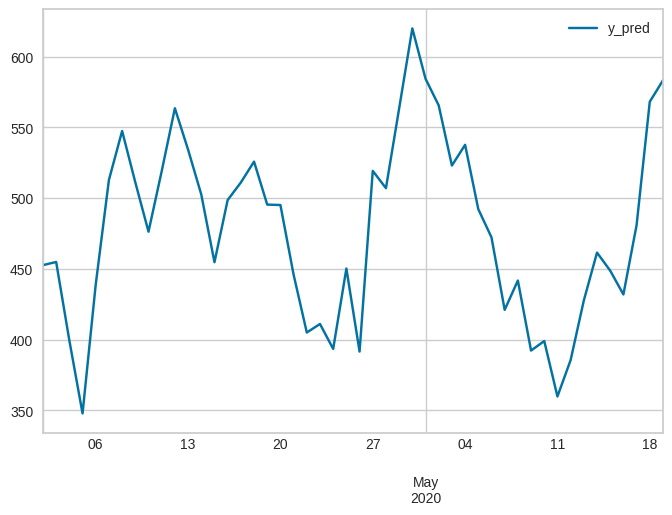

In [ ]:
future_preds = exp_future.predict_model(final_slim_model, X=future_exog)
future_preds.plot()

In [ ]:
exp_auto = TSForecastingExperiment()

# enforce_exogenous=False --> Use multivariate forecasting when model supports it, else use univariate forecasting
exp_auto.setup(
    data=data, fh=48, target='Close',enforce_exogenous=True,
    numeric_imputation_target="ffill", numeric_imputation_exogenous="ffill",
    fig_kwargs=global_fig_settings, session_id=42,use_gpu=True
)

,Description,Value
0,session_id,42
1,Target,Close
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(3565, 6)"
5,Transformed data shape,"(3565, 6)"
6,Transformed train set shape,"(3517, 6)"
7,Transformed test set shape,"(48, 6)"
8,Rows with missing values,31.1%
9,Fold Generator,ExpandingWindowSplitter


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Th

In [ ]:
best = exp_auto.compare_models(sort=metric, turbo=True)


NameError: name 'exp_auto' is not defined

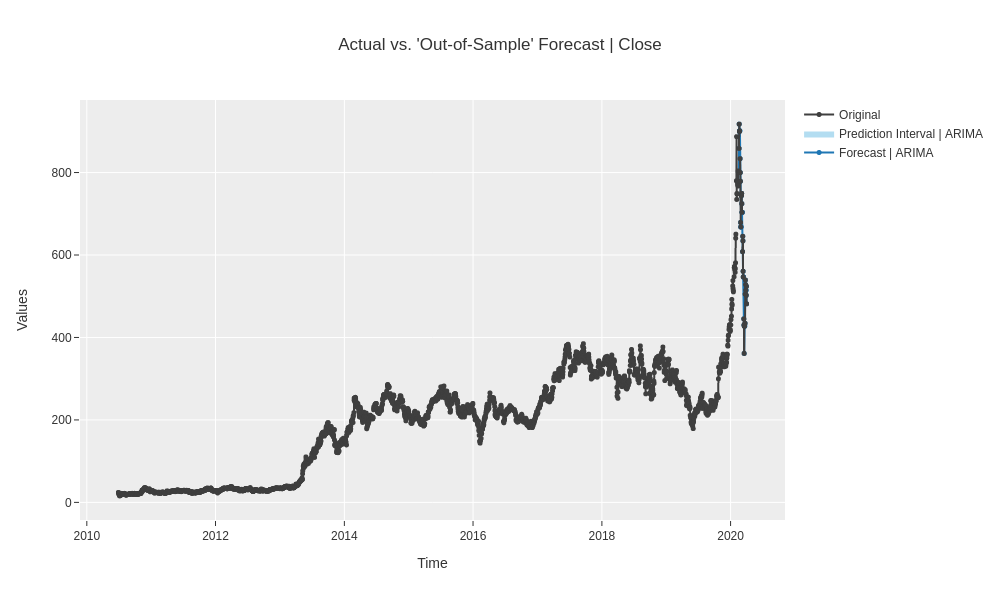

In [ ]:
exp_auto.plot_model(best)